In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

In [2]:
#Import and store the data in a data frame

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data', 
                 sep=',', engine='python')

df.columns = ['name','mdvp_fo_hz','mdvp_fhi_hz','mdvp_flo_hz','mdvp_jitter','mdvp_jitter_abs','mdvp_rap',
              'mdvp_ppq','jitter_ddp','mdvp_shimmer','mdvp_shimmer_db','shimmer_apq3','shimmer_apq5','mdvp_apq',
              'shimmer_dda','nhr','hnr','status','rpde','dfa','spread1','spread2','d2','ppe']

df.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
print(df.shape)
print(df.dtypes)
print(df.info())

(195, 24)
name                object
mdvp_fo_hz         float64
mdvp_fhi_hz        float64
mdvp_flo_hz        float64
mdvp_jitter        float64
mdvp_jitter_abs    float64
mdvp_rap           float64
mdvp_ppq           float64
jitter_ddp         float64
mdvp_shimmer       float64
mdvp_shimmer_db    float64
shimmer_apq3       float64
shimmer_apq5       float64
mdvp_apq           float64
shimmer_dda        float64
nhr                float64
hnr                float64
status               int64
rpde               float64
dfa                float64
spread1            float64
spread2            float64
d2                 float64
ppe                float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name               195 non-null object
mdvp_fo_hz         195 non-null float64
mdvp_fhi_hz        195 non-null float64
mdvp_flo_hz        195 non-null float64
mdvp_jitter        195 non-null float64
mdvp_jitter_abs    195 n

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mdvp_fo_hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
mdvp_fhi_hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
mdvp_flo_hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
mdvp_jitter,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
mdvp_jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
mdvp_rap,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
mdvp_ppq,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
jitter_ddp,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
mdvp_shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
mdvp_shimmer_db,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
df.isna().sum()

name               0
mdvp_fo_hz         0
mdvp_fhi_hz        0
mdvp_flo_hz        0
mdvp_jitter        0
mdvp_jitter_abs    0
mdvp_rap           0
mdvp_ppq           0
jitter_ddp         0
mdvp_shimmer       0
mdvp_shimmer_db    0
shimmer_apq3       0
shimmer_apq5       0
mdvp_apq           0
shimmer_dda        0
nhr                0
hnr                0
status             0
rpde               0
dfa                0
spread1            0
spread2            0
d2                 0
ppe                0
dtype: int64

In [8]:
df.corr()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
mdvp_fo_hz,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
mdvp_fhi_hz,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
mdvp_flo_hz,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
mdvp_jitter,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
mdvp_jitter_abs,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
mdvp_rap,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
mdvp_ppq,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
jitter_ddp,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
mdvp_shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
mdvp_shimmer_db,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


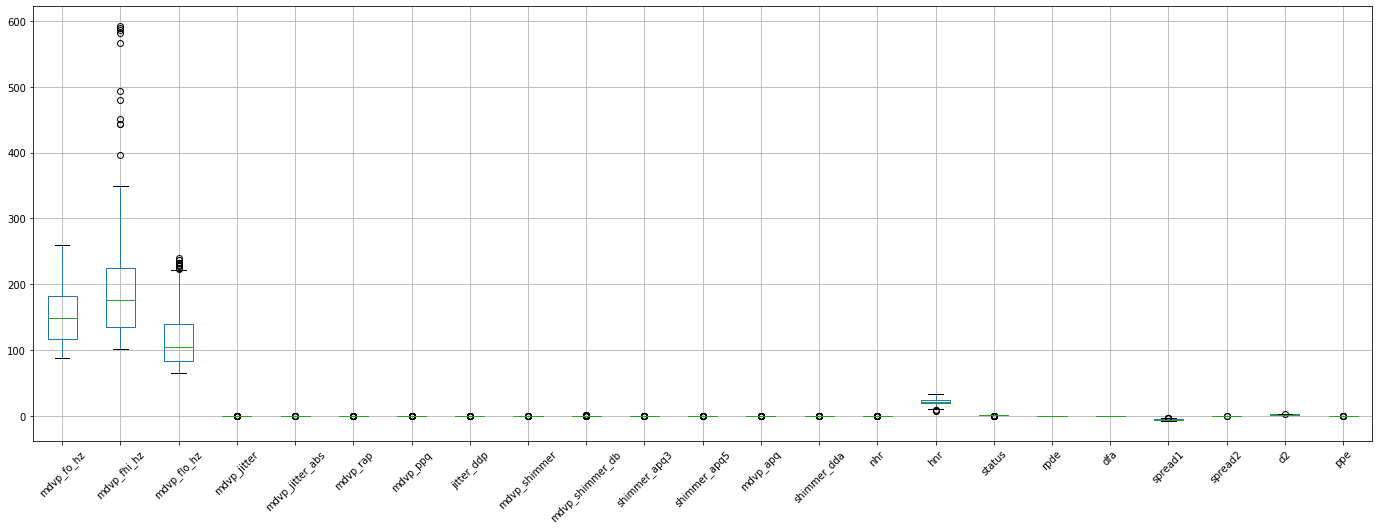

In [10]:
df.boxplot(figsize=(24,8),rot=45)

In [11]:
## Seems there are few outliers. However, will investigate further to decide on removal of variables

In [12]:
 # 'name' does not provide much information for model building. Hence we can drop it from model building process

In [13]:
df = df.drop(['name'], axis=1)

In [14]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""status ~ mdvp_fo_hz + mdvp_fhi_hz + mdvp_flo_hz + mdvp_jitter + mdvp_jitter_abs + mdvp_rap + mdvp_ppq + jitter_ddp + mdvp_shimmer + mdvp_shimmer_db + shimmer_apq3 + shimmer_apq5 + mdvp_apq + shimmer_dda + nhr + hnr + rpde + dfa + spread1 + spread2 + d2 + ppe""",df)
vif.sort_values('VIF',ascending=False) 

,Variable,VIF
11,shimmer_apq3,15086071.3
14,shimmer_dda,15077980.5
8,jitter_ddp,1395141.4
6,mdvp_rap,1394371.2
0,Intercept,2452.0
9,mdvp_shimmer,759.8
4,mdvp_jitter,192.0
7,mdvp_ppq,108.1
12,shimmer_apq5,106.4
10,mdvp_shimmer_db,99.3


In [15]:
#Calculated VIF to assess collinearity in the data; while using VIF of 5 as cut off

In [16]:
#dropping the unnecessary columns based on above VIF numbers
df = df.drop(['shimmer_apq3','jitter_ddp','mdvp_shimmer','mdvp_jitter','mdvp_rap','mdvp_shimmer_db'
              ,'shimmer_apq5','mdvp_ppq','ppe','mdvp_jitter_abs','shimmer_dda','hnr'], axis=1)

In [17]:
df.corr()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_apq,nhr,status,rpde,dfa,spread1,spread2,d2
mdvp_fo_hz,1.000000,0.400985,0.596546,-0.077774,-0.021981,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980
mdvp_fhi_hz,0.400985,1.000000,0.084951,0.004937,0.163766,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323
mdvp_flo_hz,0.596546,0.084951,1.000000,-0.107293,-0.108670,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629
mdvp_apq,-0.077774,0.004937,-0.107293,1.000000,0.694019,0.364316,0.451379,0.157276,0.673158,0.502188,0.536869
nhr,-0.021981,0.163766,-0.108670,0.694019,1.000000,0.189429,0.370890,-0.131882,0.540865,0.318099,0.470949
status,-0.383535,-0.166136,-0.380200,0.364316,0.189429,1.000000,0.308567,0.231739,0.564838,0.454842,0.340232
rpde,-0.383894,-0.112404,-0.400143,0.451379,0.370890,0.308567,1.000000,-0.110950,0.591117,0.479905,0.236931
dfa,-0.446013,-0.343097,-0.050406,0.157276,-0.131882,0.231739,-0.110950,1.000000,0.195668,0.166548,-0.165381
spread1,-0.413738,-0.076658,-0.394857,0.673158,0.540865,0.564838,0.591117,0.195668,1.000000,0.652358,0.495123
spread2,-0.249450,-0.002954,-0.243829,0.502188,0.318099,0.454842,0.479905,0.166548,0.652358,1.000000,0.523532


In [18]:
#Highest correlation in the dataset stands at ~0.7 which is acceptable.

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


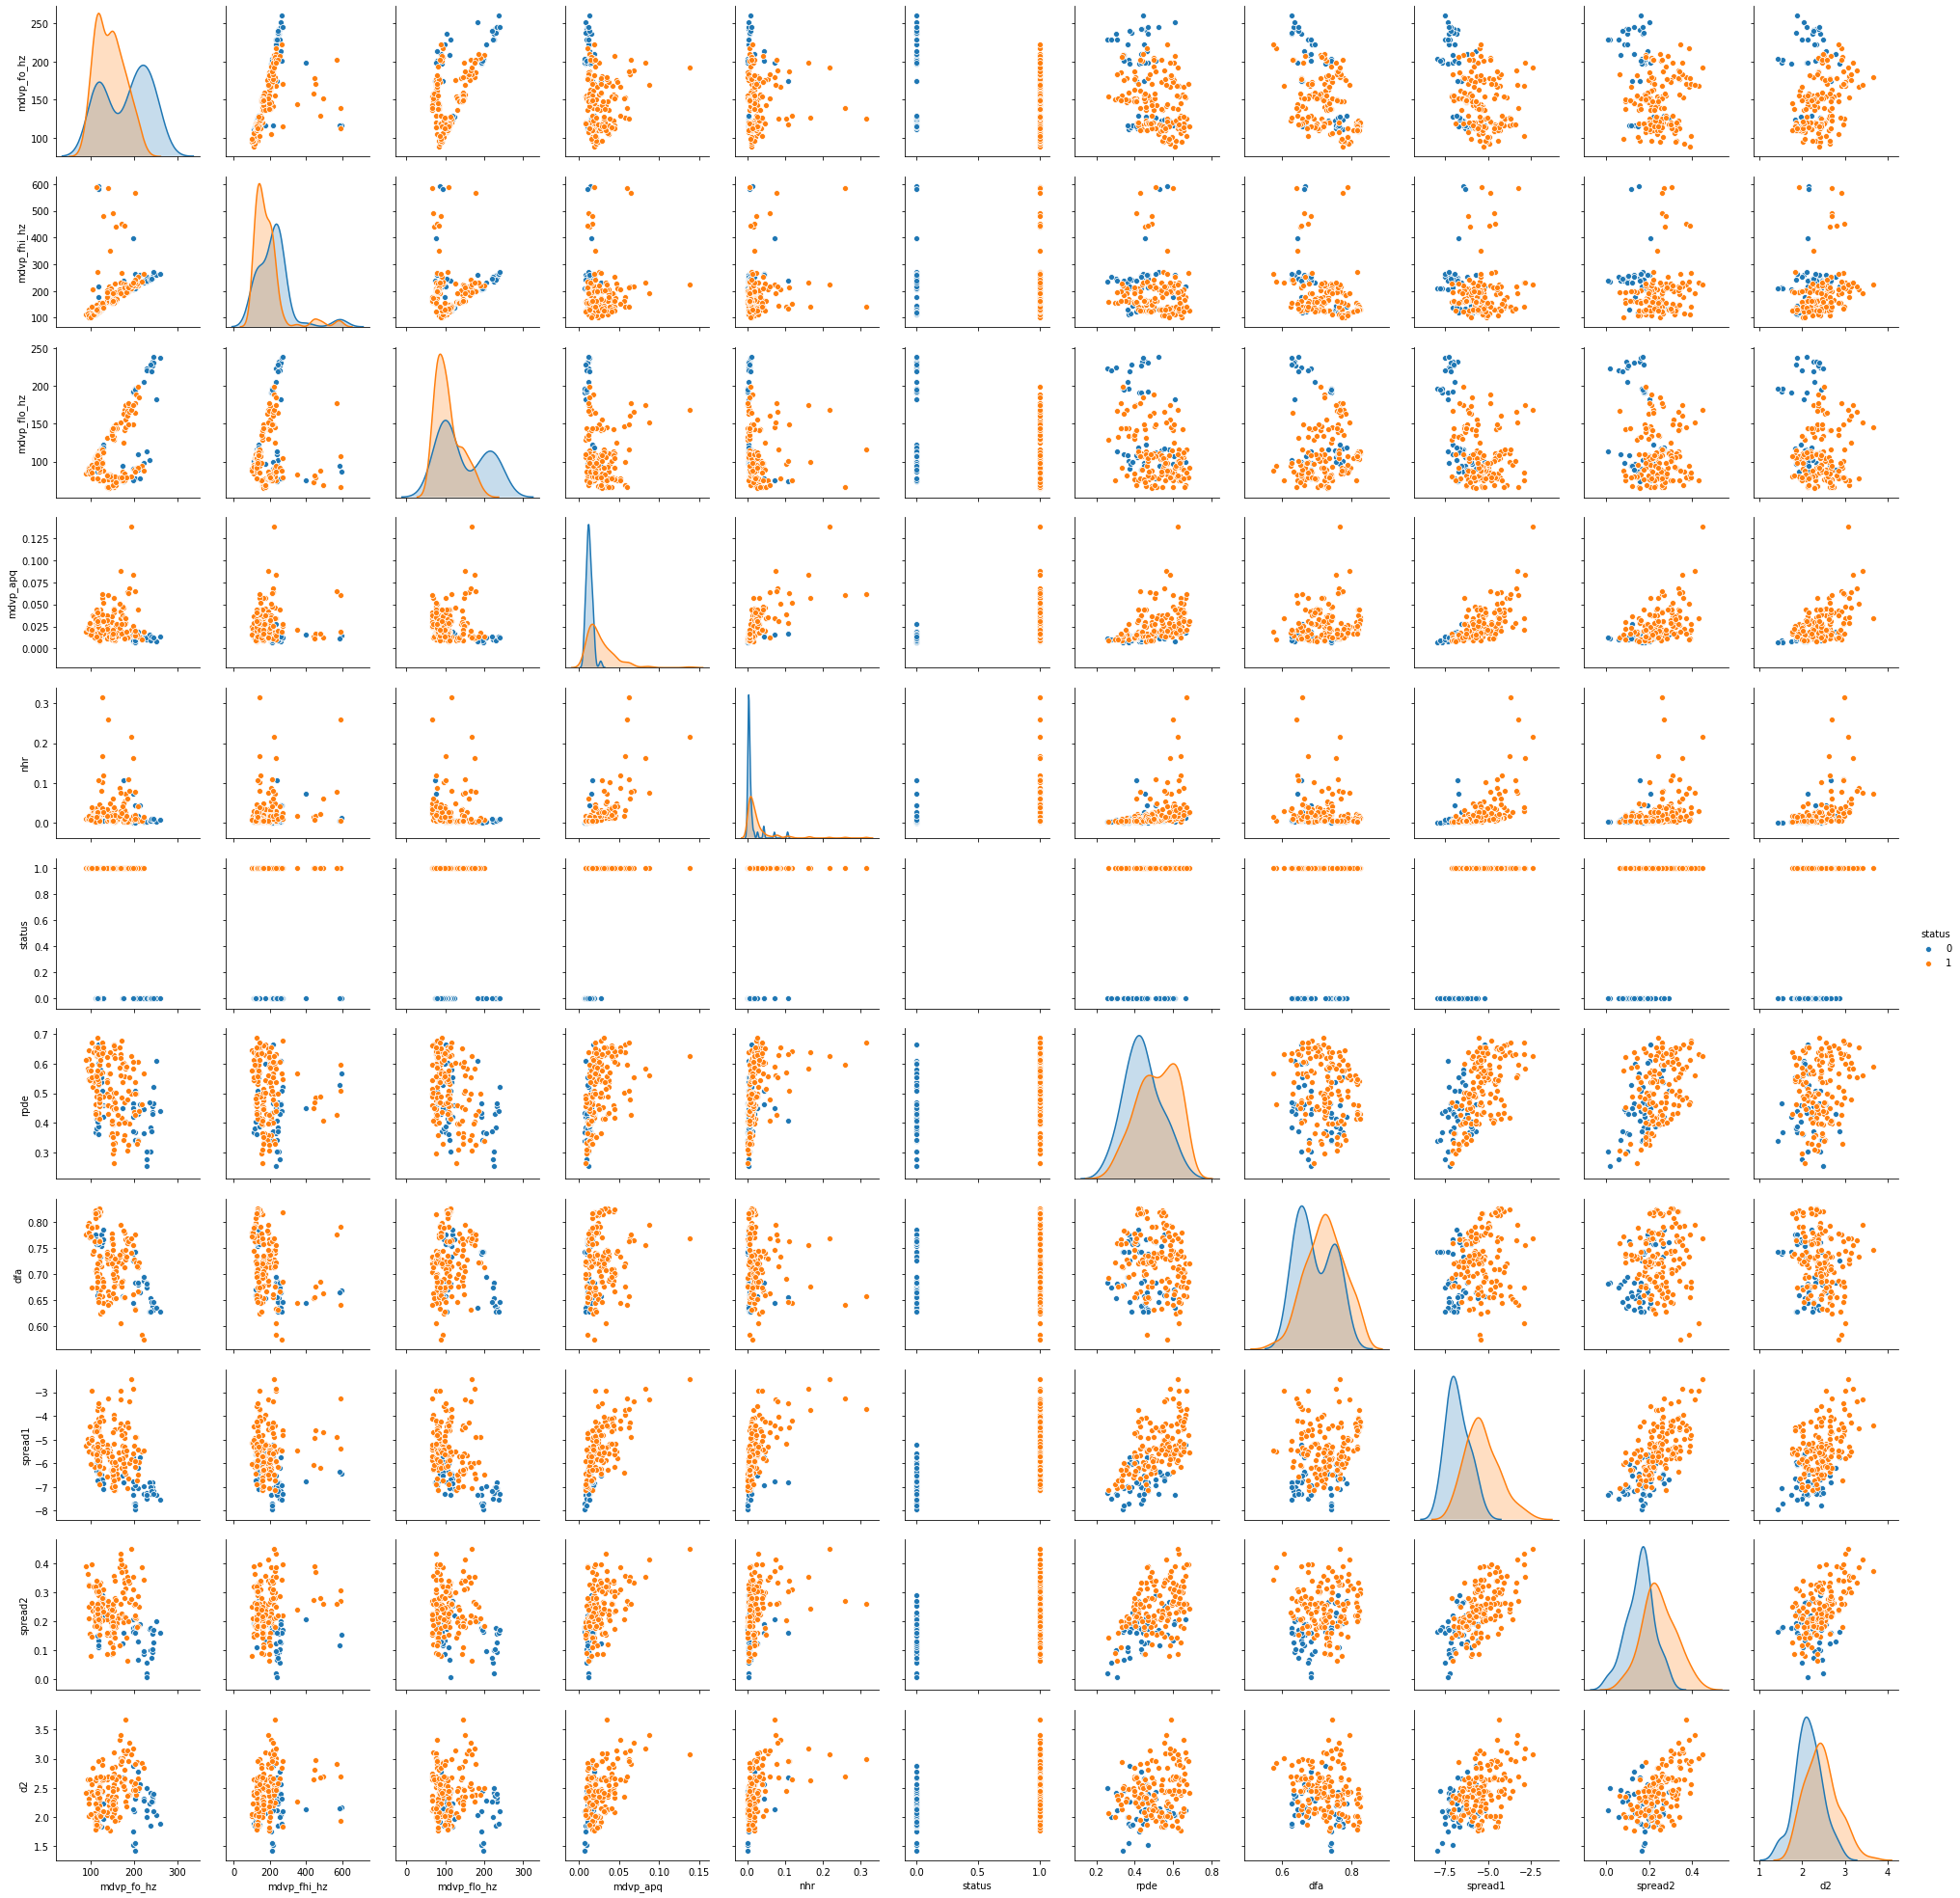

In [19]:
sns.pairplot(df, hue = "status", diag_kind="auto")

In [21]:
## Split the dataset into training and test set

X = df.loc[:, df.columns != 'status']
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [23]:
# Standardizing all features

sc=StandardScaler()
sc.fit(X_train.values)
scaled_features = sc.transform(X_train.values)
Sclaed_X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
scaled_features1 = sc.transform(X_test.values)
Sclaed_X_test = pd.DataFrame(scaled_features1, index=X_test.index, columns=X_test.columns)

In [24]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [25]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
y_predict = dt_model.predict(X_test)

In [27]:
print(metrics.accuracy_score(y_test, y_predict))
print(metrics.recall_score(y_test, y_predict))

0.847457627118644
0.8723404255319149


In [28]:
confusion_matrix(y_test,y_predict)

array([[ 9,  3],
       [ 6, 41]], dtype=int64)

In [29]:
## Creating a grid for tuning depth and min samples

In [30]:
max_depth = np.arange(1,50,1)
min_samples_leaf = np.arange(1,10,1)
dt_model = DecisionTreeClassifier(criterion = 'entropy')
parameters = {'max_depth' : max_depth,'min_samples_leaf':min_samples_leaf}

GS = GridSearchCV(dt_model, parameters, scoring = 'balanced_accuracy', cv=5)

In [31]:
GS.fit(X_train, y_train)

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 2

In [32]:
GS.best_params_

{'max_depth': 6, 'min_samples_leaf': 1}

In [33]:
GS.best_score_

0.8041754201680672

In [34]:
y_predict_gs=GS.predict(X_test)

In [35]:
print(metrics.accuracy_score(y_test, y_predict_gs))
print(metrics.recall_score(y_test, y_predict_gs))

0.847457627118644
0.8723404255319149


In [36]:
confusion_matrix(y_test,y_predict_gs)

array([[ 9,  3],
       [ 6, 41]], dtype=int64)

In [37]:
## implementing the decision tree using Random Forest. 

In [38]:
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, y_train)

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
y_predict_rfcl = rfcl.predict(X_test)

In [40]:
print(metrics.accuracy_score(y_test, y_predict_rfcl))
print(metrics.recall_score(y_test, y_predict_rfcl))


0.864406779661017
0.9148936170212766


In [41]:
#Slightly improved results when using Random Forest compared to decision trees

In [42]:
confusion_matrix(y_test,y_predict_rfcl)

array([[ 8,  4],
       [ 4, 43]], dtype=int64)

In [43]:
#Grid Search to find optimal numbers

In [44]:
n_estimators = np.arange(1,100,1)
rfcl = RandomForestClassifier()
parameters = {'n_estimators' : n_estimators}

GS_rfcl = GridSearchCV(rfcl, parameters, scoring = 'accuracy', cv=5)

In [45]:
GS_rfcl.fit(X_train, y_train)

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26,

In [46]:
print(GS_rfcl.best_params_)
print(GS_rfcl.best_score_)

{'n_estimators': 25}
0.9411764705882353


In [ ]:
## Best perf. can be seen with 25 params

In [47]:
y_predict_gs_rfcl=GS_rfcl.predict(X_test)

In [48]:
print(metrics.accuracy_score(y_test, y_predict_gs_rfcl))
print(metrics.recall_score(y_test, y_predict_gs_rfcl))

0.847457627118644
0.8936170212765957
